In [151]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

plt.style.use('ggplot')
import scipy.stats as ss
from statsmodels.tsa.stattools import acf

from arch import arch_model


## Part A


## i)

Read in data, compute log returns etc. Plot hist, kde & normal fit

In [144]:
df = pd.read_csv("./data/QRM-2022-cw1-data-a.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['log_returns'] = np.log(df['SX5E']).diff()

In [145]:
mean = df['log_returns'].mean()
stdev = df['log_returns'].std()
skew = df['log_returns'].skew()
kurt = df['log_returns'].kurtosis()

print(f"Mean: {mean}")
print(f"Stdev: {stdev}")
print(f"Skew: {skew}")
print(f"Kurtosis: {kurt}")

Mean: 0.00015487112907364611
Stdev: 0.012441542517269
Skew: -0.777391523854068
Kurtosis: 10.114398493613315


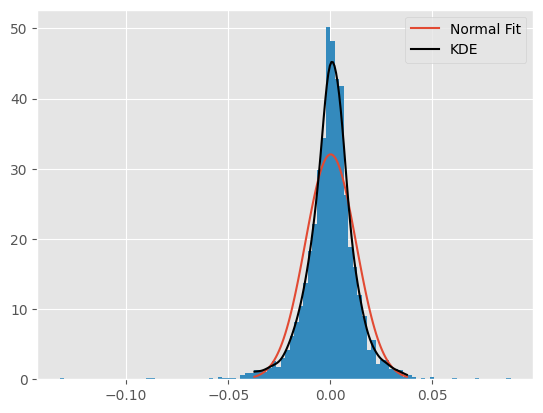

In [73]:

kde = ss.gaussian_kde(df['log_returns'].dropna())
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)

plt.plot(x, ss.norm.pdf(x, mean, stdev), label= 'Normal Fit');
plt.hist(df['log_returns'], bins=100, density=True); 
plt.plot(x, kde(x), label='KDE', color='k');

plt.legend(); plt.show()

## A ii)

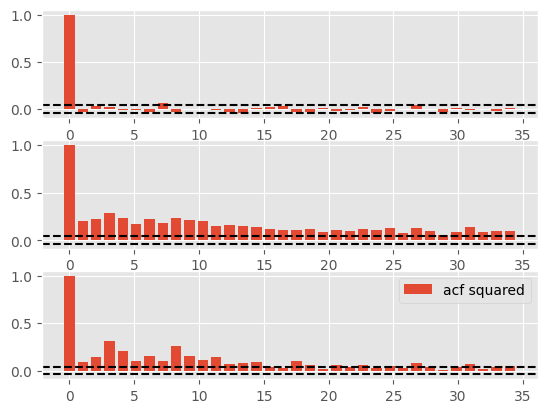

In [74]:

y_acf = acf(df['log_returns'].dropna().to_list())

x = np.linspace(0,len(y_acf),len(y_acf))

y_acf_abs = acf(np.abs(df['log_returns'].dropna()).to_list())
y_acf_sq = acf(np.power(df['log_returns'].dropna(), 2).to_list())

#create ci horizontal lines, apparently this should be (Z value for 95% CI)/sqrt(num_observations)
ci = 1.96/np.sqrt(df['log_returns'].dropna().count())


# need to fix these plots to make them look more like lecuture notes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.axhline(y=ci, linestyle='--', color='k')
ax1.axhline(y=-1*ci, linestyle='--', color='k')
ax1.bar(x, y_acf, label='ACF');

ax2.axhline(y=ci, linestyle='--', color='k')
ax2.axhline(y=-1*ci, linestyle='--', color='k')
ax2.bar(x, y_acf_abs, label='Acf abs'); 

ax3.axhline(y=ci, linestyle='--', color='k')
ax3.axhline(y=-1*ci, linestyle='--', color='k')
ax3.bar(x, y_acf_sq, label='acf squared');

plt.legend(); plt.show()


# A iii)

In [146]:
# make GARCH(1,1) model with normal innovations
model = arch_model(df['log_returns'].dropna(),
                 mean='Constant', 
                 vol='GARCH', 
                 p=1, q=1, rescale=True, dist='normal')

model_fit = model.fit()



Iteration:      1,   Func. Count:      6,   Neg. LLF: 16948.414220073522
Iteration:      2,   Func. Count:     15,   Neg. LLF: 48527592930.20491
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5179.524691374434
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4707.68847100696
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3846.5235683315423
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3747.53359436742
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3747.5191473352024
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3747.5177716301496
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3747.5177684965056
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3747.517768495862
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3747.5177684965056
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


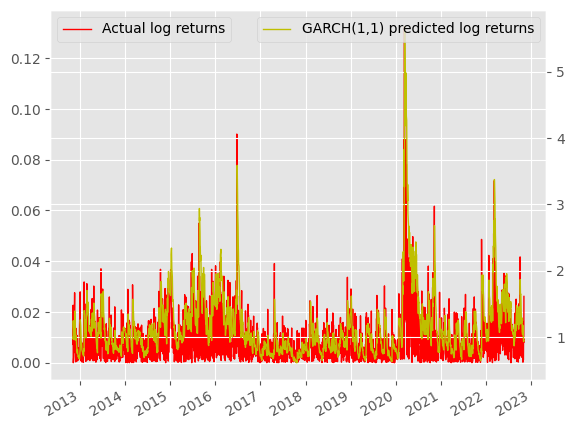

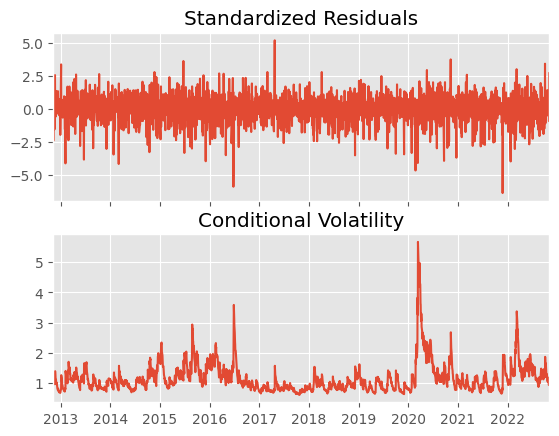

In [169]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(np.abs(df['log_returns'].dropna()), 'r-', linewidth=1, label='Actual log returns')
ax2.plot(model_fit.conditional_volatility, 'y-', linewidth=1, label='GARCH(1,1) predicted log returns')

ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# ax1.xaxis.set_minor_locator(mdates.MonthLocator()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for label in ax1.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax1.legend(loc=0); ax2.legend(loc=1)
model_fit.plot(); plt.show()



## a iv)

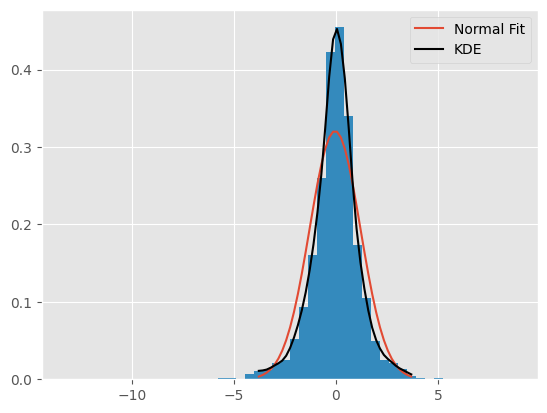

In [152]:
errors_std = np.std(model_fit.resid)
errors_mu = np.mean(model_fit.resid)

kde = ss.gaussian_kde(model_fit.resid)

x = np.linspace(errors_mu - 3*errors_std, errors_mu + 3*errors_std, 40)

plt.plot(x, ss.norm.pdf(x, errors_mu, errors_std), label= 'Normal Fit');

plt.plot(x, kde(x), label='KDE', color='k');
plt.hist(model_fit.resid, bins=50, density=True);


plt.legend(); plt.show()

In [116]:
### doesnt look super notmal too me...

